# 🎓 Proyecto: Estadística para Data Science

¡Bienvenido al reto final!

Este proyecto tiene como objetivo integrar y aplicar todas las habilidades estadísticas adquiridas durante el curso. El trabajo se divide en 4 partes:

1.  **Análisis Descriptivo (Dataset Libre):** Exploración profunda de un dataset de tu elección.
2.  **Inferencia y Modelado (Dataset Libre):** Análisis de relaciones y predicción sobre tus datos.
3.  **Regresión Lineal "From Scratch" (NumPy):** Implementación técnica de una regresión lineal simple usando solo matemáticas y NumPy.
4.  **Series Temporales:** Análisis de tendencia y estacionalidad en datos simulados.

---

###  Instrucciones Previas
Antes de comenzar, busca un dataset en [Kaggle](https://www.kaggle.com/) o una fuente confiable. Idealmente, debe tener:
*   Al menos 5 variables (numéricas y categóricas).
*   Un número razonable de filas (+1000).
*   Una variable numérica clara que te gustaría predecir (Target/Y).

**Justificación de decisiones**
* Cada elección relevante (dataset, variables, métricas, supuestos estadísticos, etc.) debe estar brevemente justificada desde un punto de vista estadístico.

**Validación de supuestos**
* Siempre que se aplique un modelo o técnica estadística, se deberán comprobar explícitamente sus supuestos (normalidad, independencia, homocedasticidad, linealidad, estacionariedad, etc., según corresponda).

**Interpretación de resultados**
* No basta con calcular estadísticas o ajustar modelos: los resultados deben ser interpretados en lenguaje claro, conectándolos con el contexto de los datos.

**Reproducibilidad**
* El trabajo debe ser completamente reproducible: cualquier persona debería poder ejecutar el código y obtener los mismos resultados sin modificaciones manuales.


## PARTE 1: Análisis Descriptivo (Dataset Propio)

**Objetivo:** Comprender la naturaleza de tus datos antes de modelar.

**Requisitos:**
1.  **Carga y Vista General:** Importa pandas, carga tu CSV y muestra las primeras filas, info y tipos de datos.
2.  **Clasificación de Variables:** Identifica explícitamente cuáles son Nominales, Ordinales, Discretas y Continuas.
3.  **Estadísticos Descriptivos:** Usa `.describe()` e interpreta la media vs mediana (¿Hay sesgo?).
4.  **Detección de Outliers:** Identifica valores atípicos en tus variables numéricas usando Boxplots y el criterio del Rango Intercuartílico (IQR).
5.  **Visualización de Distribuciones:** Plotea histogramas para tus variables principales.

**Conclusión:** Escribe un breve párrafo resumiendo la calidad de tus datos (¿Hay nulos? ¿Outliers? ¿Sesgo?).

-------

**Amplia el analisis:**

- **Análisis de valores nulos**  
  Identifica la cantidad y el porcentaje de valores nulos por variable. Reflexiona brevemente sobre si su presencia parece aleatoria o estructural.

- **Comparación entre variables numéricas**  
  Selecciona al menos dos variables numéricas y analiza si presentan escalas o rangos muy distintos, comentando posibles implicaciones para futuros modelos.

  También se debe valorar como son los valores de las diferentes metricas para diferentes categorías dentro de tu data set. ej Diferencias por genero, edad, zona geográfica ...

- **Asimetría y curtosis**  
  Calcula la asimetría (skewness) de al menos una variable numérica e interpreta su relación con la forma observada en el histograma.

- **Outliers: impacto potencial**  
  Para una variable con outliers detectados, discute brevemente cómo podrían afectar al análisis inferencial o a un modelo predictivo posterior.

- **Calidad global del dataset**  
  Amplía la conclusión final incorporando una valoración general de si el dataset está “listo para modelar” o si requeriría una fase adicional de limpieza y transformación.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')

#### **1. Cargar datos**

In [73]:
#Leemos el csv correspondiente para el análisis
df = pd.read_csv('dataset/gym_members_exercise_tracking.csv')

In [74]:
#Comprobamos que no tiene nulos el dataset
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [75]:
#Mostramos los primeros datos del dataset
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [76]:
#Mostramos la informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [77]:
#Mostramos los tipos de los datos
df.dtypes
#Tenemos un total de 15 columnas de las cuales 13 son numéricas y 2 categóricas

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

#### **2. Clasificación de variables:**



- **Nominales**: Gender, workout_Type
- **Ordinales**: Experience_Level (Aunque sea una variable de tipo int64, realmente actua como una variable categórica como si fuese principiante, intermedio y experto)
- **Discretas**: Age, Workout_Frequency (days/week)
- **Continuas**: Weight (kg), Height (m), Session_Duration (hours), Calories_Burned, Avg_BPM, Resting_BPM, Fat_Percentage, Water_Intake (liters), BMI

#### **3. Estadísticos Descriptivos:** Usa `.describe()` e interpreta la media vs mediana (¿Hay sesgo?).

In [78]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


Como podemos observar, en la mayoría de las columnas no hay una gran diferencia entre media y mediana. La media se ve afectada por los Outliers y la mediana no. Por ejemplo, si cogemos como referencia la columna `Calories_Burned` vemos como la media (905,42) es mayor que la mediana (893), esto nos indica la existencia de valores extremos que desplazan la media hacia la derecha. Aun así, en gran parte de las variables tenemos un valor similar, lo que nos da a entender que no tenemos una gran cantidad de valores extremos en los datos.

#### **4. Detección de Outliers:** Identifica valores atípicos en tus variables numéricas usando Boxplots y el criterio del Rango Intercuartílico (IQR).

Anteriormente hicimos una suposición acerca de los outliers utilizando la media y la mediana, pero en esta ocasión vamos a analizarlos a fondo y comprobar si estábamos en lo cierto.

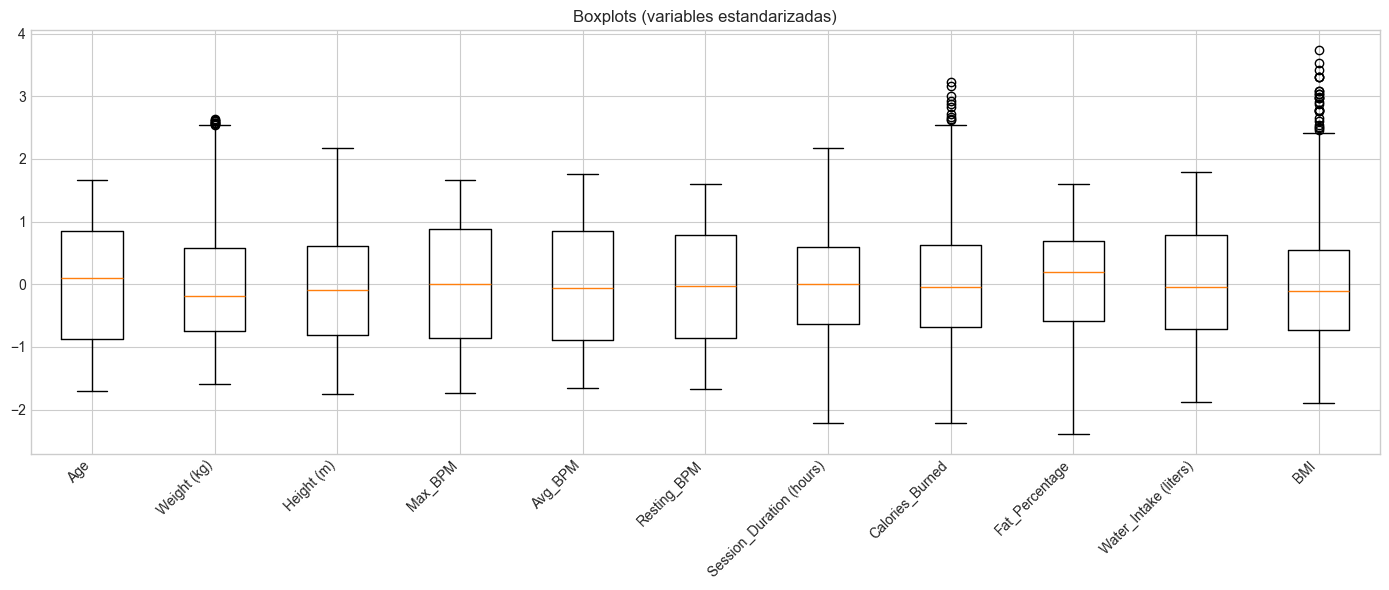

In [79]:
df_numerico = df[
    [
        "Age",
        "Weight (kg)",
        "Height (m)",
        "Max_BPM",
        "Avg_BPM",
        "Resting_BPM",
        "Session_Duration (hours)",
        "Calories_Burned",
        "Fat_Percentage",
        "Water_Intake (liters)",
        "BMI"
    ]
]

scaler = StandardScaler()
dg_std = pd.DataFrame(scaler.fit_transform(df_numerico), columns=df_numerico.columns)

plt.figure(figsize=(14, 6))
plt.boxplot(dg_std, labels=dg_std.columns, showfliers=True)
plt.xticks(rotation=45, ha="right")
plt.grid(True, axis="y")
plt.title("Boxplots (variables estandarizadas)")
plt.tight_layout()
plt.show()

Podemos observar como únicamente tenemos ouliers en `Weight (kg)`, `Calories_Burned` y `BMI`, siendo este último el que más tiene.

#### **5. Visualización de Distribuciones:** Plotea histogramas para tus variables principales.


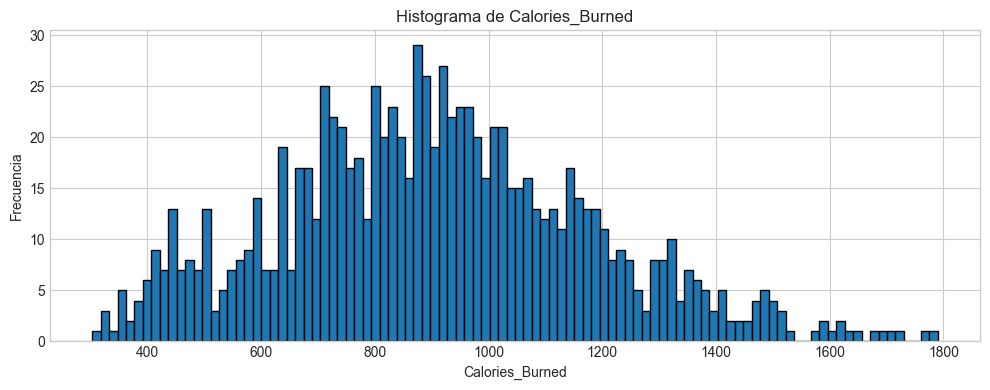

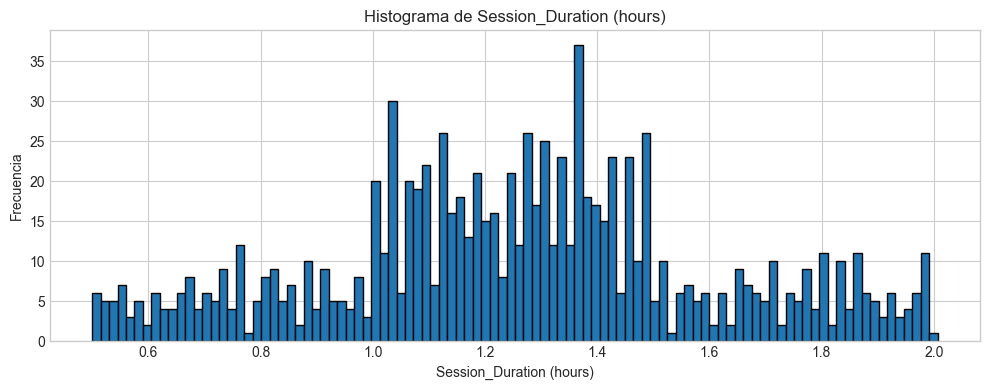

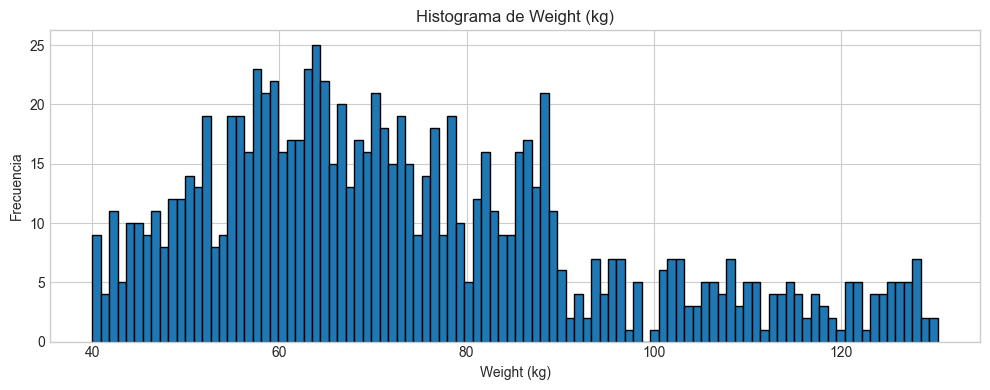

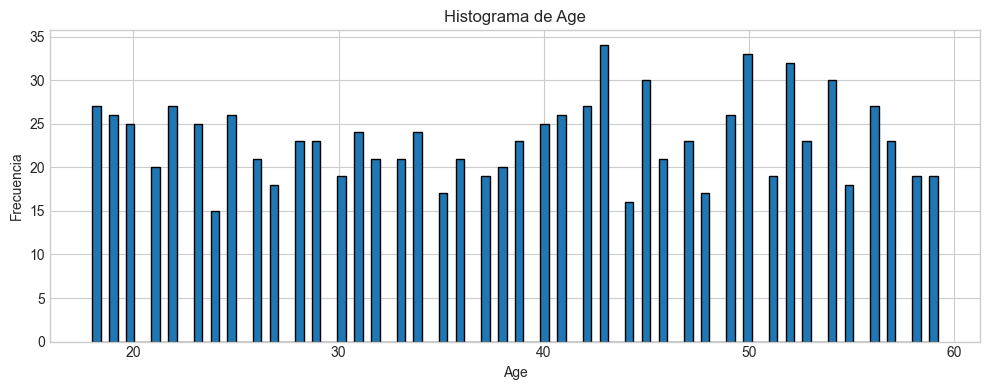

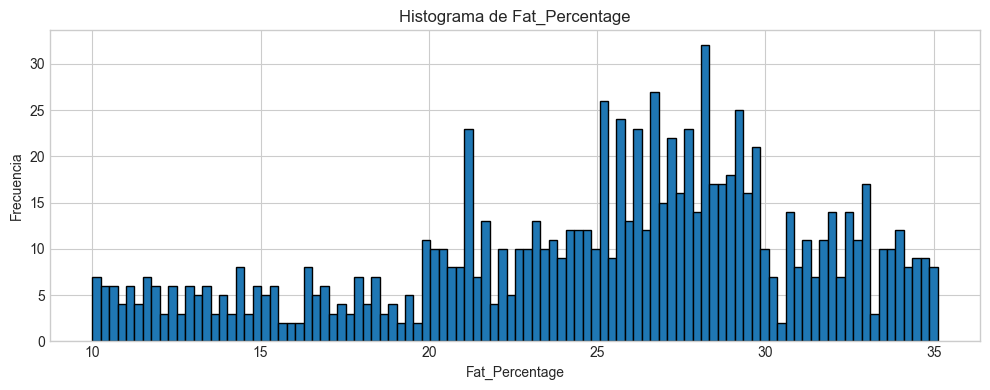

In [80]:
variables_histogramas = ["Calories_Burned", "Session_Duration (hours)", "Weight (kg)", "Age", "Fat_Percentage"]

for i in variables_histogramas:
    mayor_score = df[i].max()
    menor_score = df[i].min()
    
    n = df[i].count()
    k = 1 + np.log2(n)**2  # Convertir a entero
    h = (mayor_score - menor_score) / k
    bins = np.arange(menor_score, mayor_score + h, h)
    
    plt.figure(figsize=(10, 4))
    # Puedes usar tus bins calculados o simplemente bins=20
    plt.hist(df[i], bins=bins, edgecolor="black")  # o bins=20
    plt.title(f"Histograma de {i}")
    plt.xlabel(i)
    plt.ylabel("Frecuencia")
    plt.grid(True, axis="y")
    plt.tight_layout()
    plt.show()

Ahora vamos a realizar un pequeño con resumen con un hisotgrama de cada variable pero con menos detalle.

Text(0.5, 0.98, 'Distribución variables numéricas')

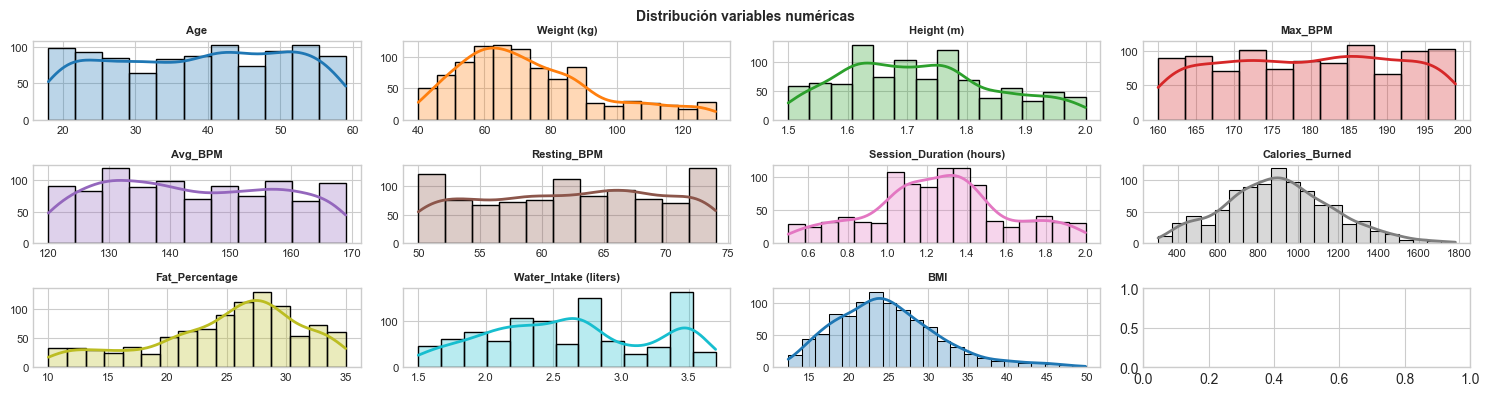

In [81]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 4))
axes = axes.flat

for i, colum in enumerate(df_numerico):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle']) * 2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 8, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold")

In [82]:
skew_fat = df["Fat_Percentage"].skew()
print(f"Asimetría de Fat_Percentage: {skew_fat:.3f}")
skew_BMI = df["BMI"].skew()
print(f"Asimetría de BMI: {skew_BMI:.3f}")


Asimetría de Fat_Percentage: -0.635
Asimetría de BMI: 0.764


En conjunto, el análisis exploratorio de los datos muestra que se trata de un conjunto de datos de buena calidad para su posterior análisis y modelado. No se detectan valores nulos en ninguna de las variables, lo que evita posibles distorsiones en los resultados.

A partir de los diagramas de cajas y bigotes se observa que la mayoría de las variables presentan una distribución equilibrada y apenas contienen valores atípicos extremos. La escasa presencia de outliers reduce el riesgo de sesgos en el entrenamiento de los modelos y contribuye a una mayor estabilidad en las estimaciones.

Los histogramas y distribuciones permiten apreciar que muchas variables siguen patrones razonables y coherentes con su naturaleza, como es el caso de `Calories_Burned`, `Session_Duration (hours)` o `BMI`, mientras que otras muestran una mayor dispersión.

Finalmente, los estadísticos descriptivos confirman que las variables presentan rangos realistas y una variabilidad adecuada, sin valores extremos anómalos. En conjunto, estos resultados indican que el conjunto de datos es adecuado para la aplicación de técnicas de análisis estadístico y modelos de regresión y clasificación, facilitando una interpretación fiable de los resultados obtenidos.


La variable `Fat_Percentage` presenta una asimetría negativa moderada (skewness ≈ -0.64), lo que indica que la distribución está ligeramente sesgada hacia la izquierda. Esto significa que la mayoría de los valores se concentran en porcentajes medios-altos, mientras que existe una cola más pronunciada hacia valores bajos. Esta forma es coherente con el histograma observado y no sugiere la presencia de valores extremos problemáticos.

Por otro lado, la variable `BMI` muestra una asimetría positiva (skewness ≈ 0.76), lo que refleja una cola más larga hacia valores altos. Esta asimetría concuerda con el diagrama de cajas y bigotes, donde se detectan algunos valores atípicos en la parte superior de la distribución. Estos outliers podrían influir en medidas resumen como la media y, en modelos sensibles a valores extremos.

No obstante, dado que el número de valores atípicos en `BMI` es reducido y sus magnitudes son coherentes, su impacto potencial sobre el análisis y los modelos predictivos es moderado.


## PARTE 2: Inferencia y Modelado (Dataset Propio)

**Objetivo:** Descubrir relaciones entre variables y predecir resultados.

**Requisitos:**
1.  **Análisis de Correlación:** Genera una matriz de correlación y visualízala con un Heatmap. ¿Qué variables están más relacionadas con tu Target?
2.  **Relaciones Bivariantes:** Crea Scatter Plots para visualizar la relación entre las variables independientes más fuertes y tu variable objetivo.
3.  **Regresión Lineal (Scikit-Learn):**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

4. **Regresión logistica:**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

**📝 Conclusión:** ¿Es tu modelo capaz de predecir con precisión? ¿Qué variables son las más influyentes?¿Qué tipo de regresión es la más apropiada?

---------
  Amplía el análisis incorporando los siguientes aspectos:

- **Diagnóstico del modelo de regresión lineal**
  Analiza los residuos del modelo entrenado:
  - Distribución de los residuos
  - Relación entre residuos y valores predichos  
  Comenta si se cumplen los supuestos básicos del modelo.

- **Regresión logística: adecuación del modelo**
  Justifica si la regresión logística es apropiada para tu variable objetivo y discute las diferencias conceptuales con la regresión lineal.

- **Comparación de modelos**
  Compara brevemente el rendimiento y la idoneidad de ambos enfoques (lineal vs. logístico) más allá de las métricas numéricas.

In [83]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

#### **1. Análisis de Correlación:** Genera una matriz de correlación y visualízala con un Heatmap. ¿Qué variables están más relacionadas con tu Target?

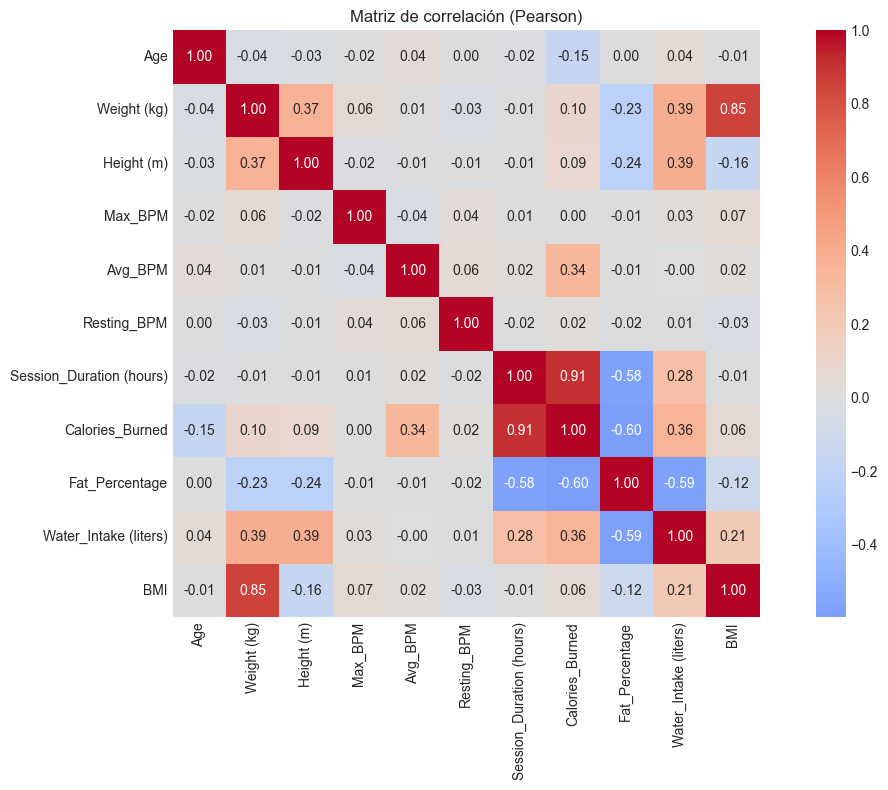

In [84]:
corr = df_numerico.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True)
plt.title("Matriz de correlación (Pearson)")
plt.tight_layout()
plt.show()

Para la variable objetivo `Fat_Percentage` se observa que varias variables presentan correlaciones de magnitud similar. La variable con mayor correlación es `Calories_Burned`, seguida muy de cerca por `Water_Intake (liters)` y `Session_Duration (hours)`, mientras que otras variables como `Weight (kg)` o `Height (m)` muestran correlaciones más débiles.

Además, se aprecia que las correlaciones son todas negativas, lo que resulta coherente desde un punto de vista fisiológico, ya que un mayor nivel de actividad física, una mayor duración del entrenamiento o un mayor gasto energético tienden a asociarse con una reducción del porcentaje de grasa corporal.


#### **Relaciones Bivariantes:** Crea Scatter Plots para visualizar la relación entre las variables independientes más fuertes y tu variable objetivo.

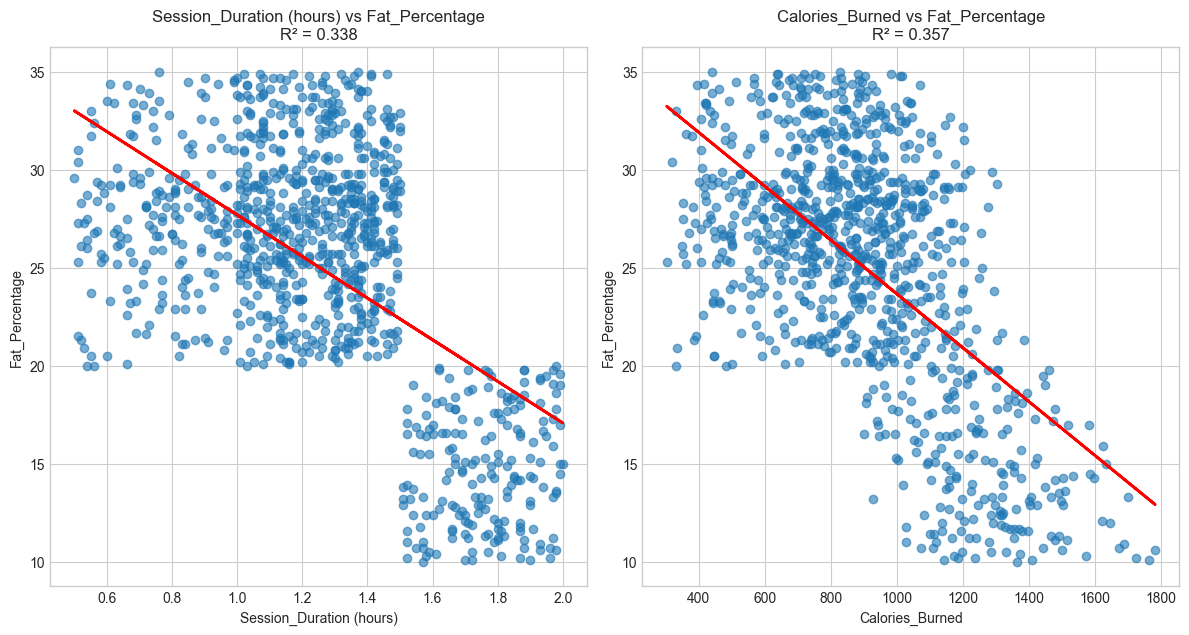

In [85]:
target = "Fat_Percentage"
variables_fuertes = [
    "Session_Duration (hours)",
    "Calories_Burned",
]
plt.figure(figsize=(12, 12))

for i, var in enumerate(variables_fuertes, 1):
    x = df[var].values
    y = df[target].values

    a, b = np.polyfit(x, y, 1)
    y_fit = a * x + b

    r2 = np.corrcoef(x, y)[0, 1] ** 2

    plt.subplot(2, 2, i)
    plt.scatter(x, y, alpha=0.6)
    plt.plot(x, y_fit, color="red", linewidth=2)
    plt.xlabel(var)
    plt.ylabel(target)
    plt.title(f"{var} vs {target}\nR² = {r2:.3f}")
    plt.grid(True)

plt.tight_layout()
plt.show()


En ambos gráficos se observa una relación negativa entre las variables y el `Fat_Percentage`. A medida que aumenta la duración de la sesión o las calorías quemadas, el porcentaje de grasa corporal tiende a disminuir.

La relación es moderada, como indican los valores de R² (alrededor de 0.33–0.36), lo que significa que estas variables explican parte del porcentaje de grasa, pero no toda su variabilidad. Esto es razonable, ya que el porcentaje de grasa depende también de otros factores que no están incluidos en el análisis.

En conjunto, los gráficos muestran una tendencia clara, pero con una dispersión considerable, lo que indica que, aunque existe relación, no es suficiente para predecir el porcentaje de grasa por sí sola con alta precisión.


#### **3. Regresión Lineal (Scikit-Learn):**

MSE: 17.755851471927677
RMSE: 4.21376927132083
R²: 0.5544729670945013


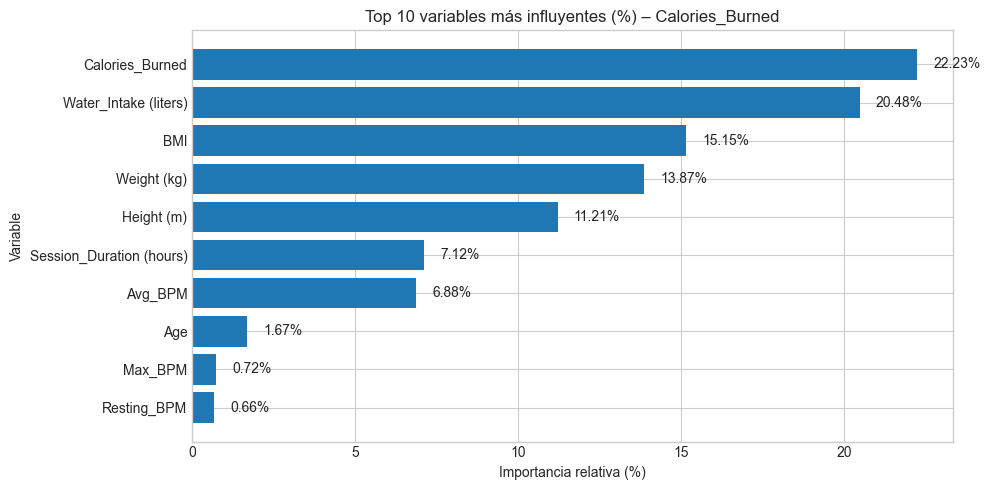

In [86]:
# X e y (mejor del mismo df numérico)
cols_X = [c for c in df_numerico.columns if c != "Fat_Percentage"]
X = df_numerico[cols_X]
y = df_numerico["Fat_Percentage"]

# Train/Test 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

# 3. Escalar los valores (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

# Entrenar
model.fit(X_train_scaled, y_train)

# Coeficientes del modelo
coef = pd.Series(model.coef_, index=X.columns)
coef_abs = coef.abs()

# Importancia en porcentaje
imp_pct = 100 * coef_abs / coef_abs.sum()
imp_pct_top10 = imp_pct.sort_values(ascending=False).head(10)

# Predicciones
y_pred = model.predict(X_test_scaled)

# Métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)


# Plot Top variables (%)
plt.figure(figsize=(10, 5))
bars = plt.barh(imp_pct_top10.index[::-1], imp_pct_top10.values[::-1])
plt.xlabel("Importancia relativa (%)")
plt.ylabel("Variable")
plt.title("Top 10 variables más influyentes (%) – Calories_Burned")

# Añadir valor numérico al final de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.5,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.2f}%",
        va="center"
    )

plt.tight_layout()
plt.show()

El modelo de regresión presenta un ajuste moderado, con un valor de R² de aproximadamente 0.55, lo que indica que el modelo es capaz de explicar algo más de la mitad de la variabilidad de la variable objetivo.

En cuanto a la importancia de las variables, se observa que `Calories_Burned` y `Water_Intake (liters)` son las más influyentes en el modelo, seguidas por variables relacionadas con la composición corporal como `BMI`, `Weight (kg)` y `Height (m)`.

En conjunto, el modelo captura las relaciones principales entre las variables, aunque todavía existe una parte relevante de la variabilidad que no es explicada, lo que es coherente con la complejidad del fenómeno estudiado.


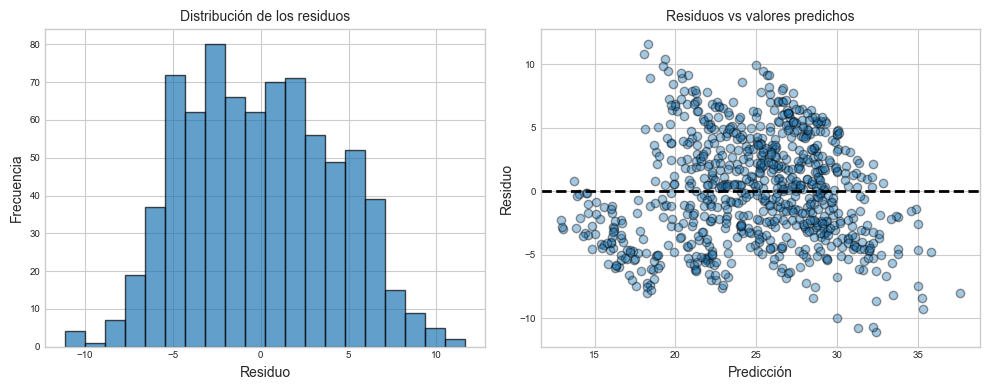

In [87]:
prediccion_train = model.predict(X_train_scaled)
residuos = y_train - prediccion_train

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# 1) Distribución de residuos
axes[0].hist(residuos, bins=20, edgecolor="black", alpha=0.7)
axes[0].set_title("Distribución de los residuos", fontsize=10)
axes[0].set_xlabel("Residuo")
axes[0].set_ylabel("Frecuencia")
axes[0].tick_params(labelsize=7)

# 2) Residuos vs valores predichos
axes[1].scatter(prediccion_train, residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[1].axhline(y=0, linestyle="--", color="black", lw=2)
axes[1].set_title("Residuos vs valores predichos", fontsize=10)
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Residuo")
axes[1].tick_params(labelsize=7)

fig.tight_layout()
plt.show()


En el histograma de los residuos se observa una distribución aproximadamente simétrica y centrada en torno a cero. Esto indica que el modelo no presenta un sesgo claro, ya que los errores positivos y negativos se compensan de forma razonable.

En el gráfico de residuos frente a valores predichos los puntos se distribuyen alrededor de la línea horizontal en cero. Aunque se aprecia cierta estructura y algo más de dispersión en algunos rangos de predicción.

En conjunto, el análisis de los residuos sugiere que el modelo se ajusta de forma razonable a los datos, aunque no explica completamente toda la variabilidad de la variable objetivo, lo cual es esperable dada la complejidad del fenómeno analizado.

#### 4. **Regresión logistica:**

La regresión logística es solo válida para variables objetivo binarias (0/1), por este motivo hemos decidido adaptar nuestra varibale objetivo `Fat_Percentage` a un formato binario. Para ello hemos dividido los valores en dos: 0 -> por debajo de la media y 1 -> por encima de la media. De esta forma podemos realizar un análisis mucho más general pero trantando de perfeccionar el modelo. 

A parte de esto, queriamos utilizar la única variable binaria del dataset: el género. Hemos creado otra regresión logísitica para predecir el sexo del usuario y así poder usar una variable realmente binaria para observar los resultados.

##### **Regresión Logísitca: Fat_Percentage**

In [88]:
media_grasa = df["Fat_Percentage"].mean()
df["Fat_bin"] = (df["Fat_Percentage"] > media_grasa).astype(int)

X = df_numerico.drop("Fat_Percentage", axis=1)
y = df["Fat_bin"]

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 3. Escalar los valores (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo
modelo = LogisticRegression(max_iter=5000)
modelo.fit(X_train_scaled, y_train)

# Predicciones
y_pred = modelo.predict(X_test_scaled)

# Evaluación
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Accuracy de entrenamiento:", modelo.score(X_train_scaled, y_train))
n_totales = y_test.count()
print(f"Total de test: {n_totales}")
print(f"Valores de predicción: \n{y_pred}\n\n")
reales = y_test.to_numpy()
print(f"Valores reales: \n{reales}")
fallos = (y_pred != reales).sum()
print(f"\nFallos: {fallos}")
n_aciertos = y_test.count()-fallos
print(f"Aciertos: {n_aciertos}")
print(f"Porcentaje real de aciertos en el test: {(n_aciertos/n_totales)*100:.2f}%")

#Eliminamos la nueva columan para evitar errores en otros ejercicio
df = df.drop("Fat_bin", axis=1)

Intercept: [0.61649008]
Coeficiente: [('Age', -0.3078731707176919), ('Weight (kg)', -0.25138482051780947), ('Height (m)', -0.03761193824106339), ('Max_BPM', -0.08181549518233225), ('Avg_BPM', 0.34953887971769737), ('Resting_BPM', 0.0876761303140094), ('Session_Duration (hours)', -0.04051871640140802), ('Calories_Burned', -1.2661710924291223), ('Water_Intake (liters)', -1.0481199528242915), ('BMI', 0.10679832437133394)]
Accuracy de entrenamiento: 0.794344473007712
Total de test: 195
Valores de predicción: 
[1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1
 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0
 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 0]


Valores reales: 
[0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 

El modelo de regresión logística obtiene un 77,44 % de acierto en el conjunto de test, lo que indica que es capaz de clasificar correctamente la mayoría de los casos en función de si el porcentaje de grasa está por encima o por debajo de la media. Este nivel de precisión es razonable teniendo en cuenta que se trata de un fenómeno complejo y que se ha simplificado a una clasificación binaria.

La diferencia entre el accuracy de entrenamiento y el de test es pequeña, lo que sugiere que el modelo generaliza bien y no presenta un problema claro de sobreajuste.

Tras realizar ambas regresiones vemos como ninguna de las dos tiene una precisión extremadamente alta debido a la complejidad de la variable, donde intervienen muchos otros valores no expuestos en el dataset como la alimentación de cada persona. Cual usar dependerá del sentido que quieras darle al análisis, si buscas algo más general como estar por debajo o por encima de la media, la regresión logística es una muy buena opción al darnos mayor precisión.

##### **Regresión Logísitca: Gender**

In [89]:
#Creamos una nueva columna donde 1 sea Hombre y 0 Mujer
df["Gender_bin"] = df["Gender"].map({"Male": 1, "Female": 0})

X = df_numerico
y = df["Gender_bin"]

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 3. Escalar los valores (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo
modelo = LogisticRegression(max_iter=5000)
modelo.fit(X_train_scaled, y_train)

# Predicciones
y_pred = modelo.predict(X_test_scaled)

# Evaluación
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Accuracy de entrenamiento:", modelo.score(X_train_scaled, y_train))
n_totales = y_test.count()
print(f"Total de test: {n_totales}")
print(f"Valores de predicción: \n{y_pred}\n\n")
reales = y_test.to_numpy()
print(f"Valores reales: \n{reales}")
fallos = (y_pred != reales).sum()
print(f"\nFallos: {fallos}")
n_aciertos = y_test.count()-fallos
print(f"Aciertos: {n_aciertos}")
print(f"Porcentaje real de aciertos en el test: {(n_aciertos/n_totales)*100:.2f}%")

#Eliminamos la nueva columan para evitar errores en otros ejercicio
df = df.drop("Gender_bin", axis=1)

Intercept: [0.81875181]
Coeficiente: [('Age', 0.3935649408275226), ('Weight (kg)', 0.9240909294094727), ('Height (m)', 1.7013082094528345), ('Max_BPM', -0.1782474251651054), ('Avg_BPM', -1.046981286125911), ('Resting_BPM', -0.03803650881794062), ('Session_Duration (hours)', -4.187044080749285), ('Calories_Burned', 3.705624480968905), ('Fat_Percentage', -0.7388520812431401), ('Water_Intake (liters)', 1.8864901559646279), ('BMI', 0.4554081720946743)]
Accuracy de entrenamiento: 0.9473007712082262
Total de test: 195
Valores de predicción: 
[0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0
 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1
 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0
 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1
 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0
 0 1 0 0 1 0 0 0 1 1]


Valores reales: 
[1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1

El modelo obtiene un 94,87 % de acierto en el conjunto de test, lo que indica un rendimiento muy alto en la clasificación.

## PARTE 3: Regresión Lineal "From Scratch" (Datos Simulados)

**Objetivo:** Demostrar que entiendes la matemática detrás de `LinearRegression()` implementándola con NumPy.

Amplia con:

- **Predicción y evaluación**
  Utiliza tu implementación para:
  - Realizar predicciones
  - Calcular manualmente el **MSE** y el **R²**, sin usar funciones de Scikit-Learn.

- **Comparación con Scikit-Learn**
  Entrena un modelo `LinearRegression()` sobre los mismos datos y compara:
  - Coeficientes
  - Métricas de evaluación  
  Discute posibles diferencias numéricas.


#### **1. Implementamos de forma manual la regresión lineal y calculamos MSE y R²**

MSE: 0.8657448758788245
R²: 0.7523505181978967
Intercepto estimado: 4.0088242753600865
Pendiente estimada: 2.8274849952418455


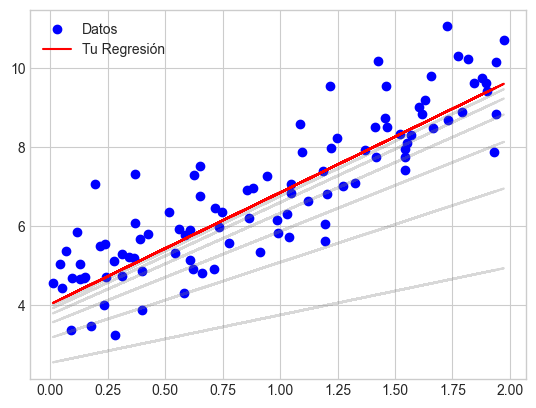

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# --- NO TOCAR: GENERACIÓN DE DATOS ---
np.random.seed(42)
X_mock = 2 * np.random.rand(100, 1)
y_mock = 4 + 3 * X_mock + np.random.randn(100, 1)
# -----------------------------------

def evolve_linear_regression( X, y, iteraciones=8, eta=0.1):
    """
    Calcula la pendiente (w) y el intercepto (beta_0)
    usando las fórmulas de OLS con NumPy.
    Returns: (b, w)
    """
    # TU CÓDIGO AQUÍ
    #Generacion aleatoria de parametros (numpy)
    n = len(X)

    # Generacion aleatoria de parametros (numpy) --> Paso 1
    w = np.random.randn()
    b = np.random.randn()

    for i in range(1, iteraciones):
        # calcular el error --> Paso 2
        y_pred = b + w * X
        error = y - y_pred  # Si error > 0 -> estamos por debajo. Si error < 0 -> estamos por encima

        # Gradientes --> Paso 3
        dw = (-2 / n) * np.sum(X * error)
        db = (-2 / n) * np.sum(error)

        # Ajustar parametros --> Paso 4
        w = w - eta * dw
        b = b - eta * db

        # pintar recta
        pintar_recta(b, w, X, y)

    return b, w, y_pred


def pintar_recta(b, w, x, y):
    plt.plot(X_mock, b + w * X_mock, color="gray", alpha=0.3)


# Probemos tu función
b0, b1, y_pred = evolve_linear_regression(X_mock, y_mock)
mse = np.mean((y_mock-y_pred)**2)
print(f"MSE: {mse}")
SSres = np.sum((y_mock-y_pred)**2)
SStot = np.sum((y_mock - np.mean(y_mock))**2)
r2 = 1 - (SSres/SStot)
print(f"R²: {r2}")
print(f"Intercepto estimado: {b0}")
print(f"Pendiente estimada: {b1}")

# Verificación visual
plt.scatter(X_mock, y_mock, color="blue", label="Datos")
plt.plot(X_mock, b0 + b1 * X_mock, color="red", label="Tu Regresión")
plt.legend()
plt.show()


#### **2. Comparamos el modelo con la regresión lineal de NumPy**

In [91]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X_mock + np.random.randn(100, 1)

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)


# Evaluación
print('Intercepto:', modelo.intercept_)
print('Pendiente:', modelo.coef_[0])
print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))

Intercepto: [4.1283957]
Pendiente: [2.75203362]
MSE: 0.6592920985940569
R²: 0.8331861780165926


Al comparar los coeficientes obtenidos por ambos modelos, se observa que tanto el intercepto como la pendiente estimados son cercanos a los valores reales (4 y 3, respectivamente). No obstante, el modelo de Scikit-learn presenta coeficientes ligeramente más próximos.

En cuanto a las métricas de evaluación, el modelo de Scikit-learn obtiene un menor error cuadrático medio (MSE) y un coeficiente de determinación (R²) más elevado, lo que indica un mejor ajuste a los datos.

## PARTE 4: Series Temporales (Datos Simulados)

**Objetivo:** Analizar tendencias y estacionalidad en una serie temporal generada.

**Tareas:**
1.  Convierte el índice a formato DateTime.
2.  Haz un resampleo mensual (`'M'`) mostrando la media de ventas.
3.  Calcula una **Media Móvil** de 3 meses para suavizar la curva.
4.  Usa `seasonal_decompose` para visualizar los componentes (Tendencia, Estacionalidad y ruido).

---

Amplia Con:

- **Generación de la serie**
  Describe brevemente cómo se ha generado la serie temporal simulada, indicando si incluye tendencia, estacionalidad y ruido.

- **Comparación de suavizados**
  Calcula una segunda media móvil con una ventana distinta y compara visualmente ambos suavizados. Comenta las diferencias observadas.

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose

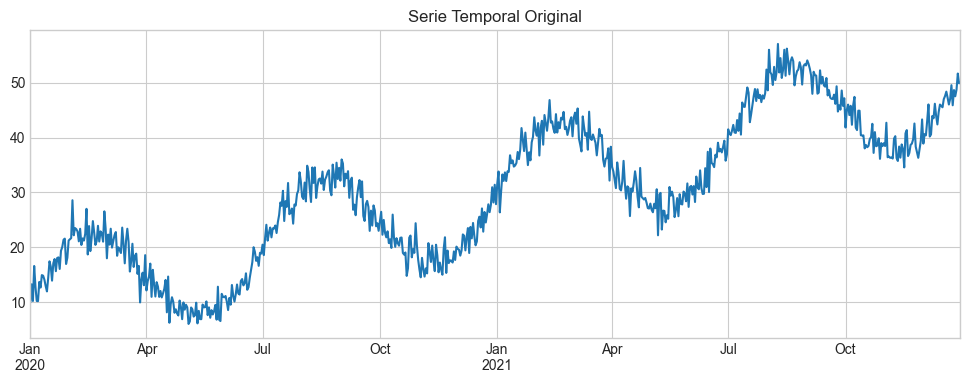

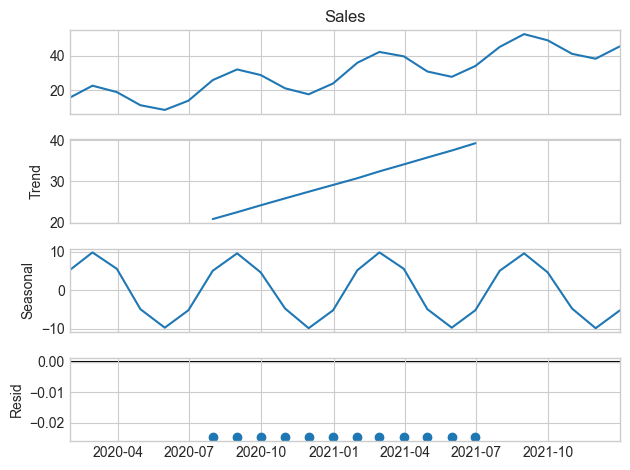

In [93]:
# --- NO TOCAR: GENERACIÓN DE DATOS TEMPORALES ---
dates = pd.date_range(start='2020-01-01', periods=365*2, freq='D')
values = np.linspace(10, 50, len(dates)) + 10 * np.sin(np.linspace(0, 3.14*8, len(dates))) + np.random.normal(0, 2, len(dates))
ts_df = pd.DataFrame({'Sales': values}, index=dates)
# -----------------------------------------------
# TU CÓDIGO AQUÍ
ts_df.index = pd.to_datetime(ts_df.index)
# 1. Plot inicial
ts_df['Sales'].plot(title='Serie Temporal Original', figsize=(12,4))

# 2. Resampleo Mensual
ventas_mes = ts_df["Sales"].resample("ME").mean()

# 3. Media Móvil
ts_df['Moving_Avg'] = ventas_mes.rolling(window=3).mean()

# 4. Descomposición
result = seasonal_decompose(ventas_mes, model="additive", period=12)
result.plot()
plt.show()
